In [96]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
accuracy_score,
f1_score,
precision_score,
recall_score,
)
import pickle

In [97]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [98]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

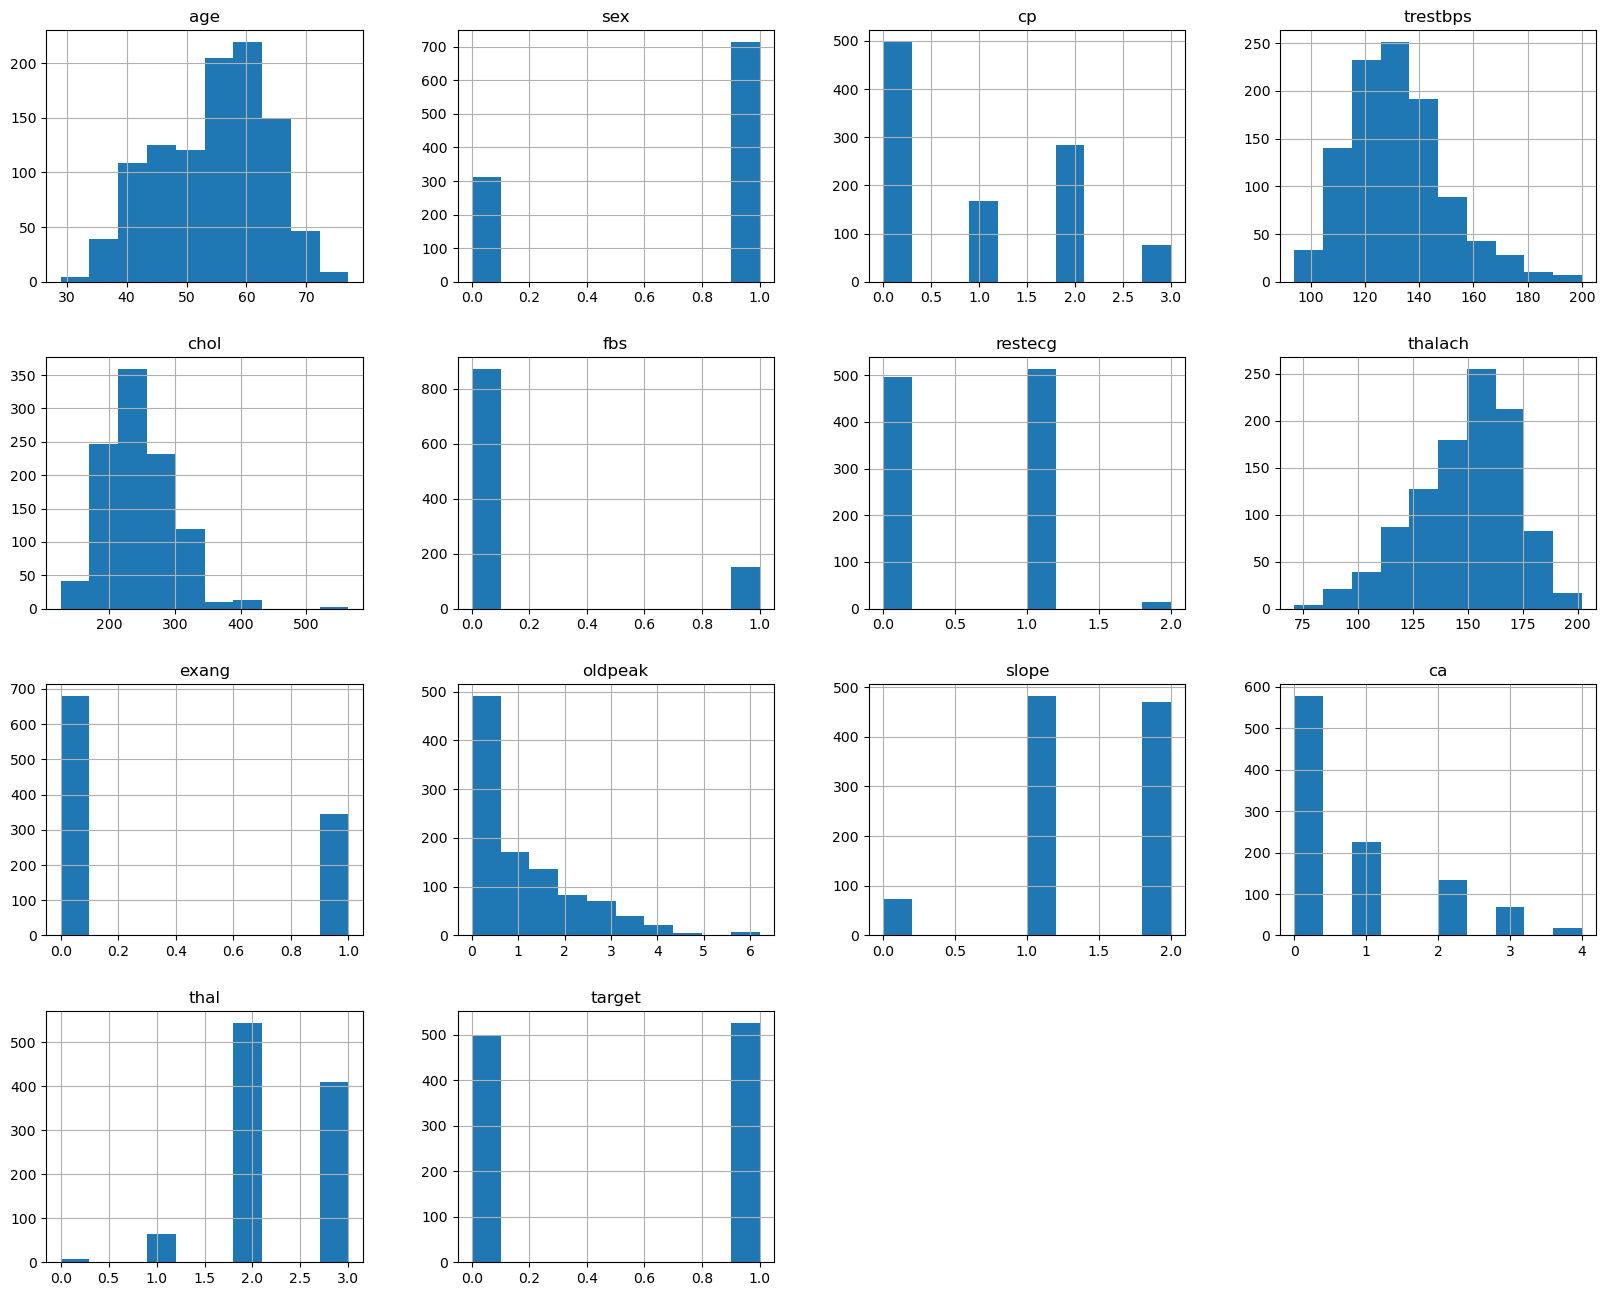

In [99]:
data.hist(figsize=(20, 16))

In [100]:
data.shape

(1025, 14)

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [102]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [103]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [104]:
data['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [105]:
x = data.drop(columns='target', axis=1)
y = data['target']


In [106]:
print(x)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         2   2     3  
1         0   0     3  
2  

In [107]:
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64


In [108]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
test_size = 0.25, random_state = 2)


In [109]:
print(x.shape , x_train.shape , x_test.shape )

(1025, 13) (768, 13) (257, 13)


In [110]:
model1= GaussianNB()

In [111]:
model1.fit(x_train,y_train)

GaussianNB()

In [112]:
# accuracy on training data NaiveBayes
x_train_prediction = model1.predict(x_train)
training_data_accuracy = accuracy_score(y_train, x_train_prediction )
print(training_data_accuracy)

0.8411458333333334


In [113]:
# accuracy  on test data NaiveBayes
x_test_prediction1 = model1.predict(x_test)
test_accuracy1 = accuracy_score( y_test, x_test_prediction1)
test_recall1=recall_score(y_test, x_test_prediction1)
test_precision1=precision_score(y_test, x_test_prediction1)
test_f1_1=f1_score(y_test, x_test_prediction1)

print(test_accuracy1)

0.8287937743190662


In [114]:
model2= RandomForestClassifier()

In [115]:
model2.fit(x_train, y_train)

RandomForestClassifier()

In [116]:
# accuracy on training data RandomForest
x_train_prediction2 = model2.predict(x_train)
training_data_accuracy2= accuracy_score(x_train_prediction2, y_train)
print(training_data_accuracy2)

1.0


In [117]:
# accuracy on test data RandomForest
x_test_prediction2 = model2.predict(x_test)
test_accuracy2 = accuracy_score( y_test,x_test_prediction2)
test_recall2=recall_score(y_test, x_test_prediction2)
test_precision2=precision_score(y_test, x_test_prediction2)
test_f1_2=f1_score(y_test, x_test_prediction2)
print(test_accuracy2)

0.9610894941634242


In [118]:
model3=LogisticRegression()

In [119]:
model3.fit(x_train, y_train)

c:\Users\Maryam\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [120]:
# accuracy on training data LogisticRegression
x_train_prediction3 = model3.predict(x_train)
training_data_accuracy3 = accuracy_score(y_train,x_train_prediction)
print(training_data_accuracy3)

0.8411458333333334


In [121]:
# accuracy on test data LogisticRegression
x_test_prediction3 = model3.predict(x_test)
test_accuracy3 = accuracy_score(x_test_prediction3, y_test)
test_recall3=recall_score(y_test, x_test_prediction3)
test_precision3=precision_score(y_test, x_test_prediction3)
test_f1_3=f1_score(y_test, x_test_prediction3)
print(test_accuracy3)

0.8210116731517509


In [122]:
x_test_prediction1 = model1.predict(x_test)  # Naive Bayes
x_test_prediction2 = model2.predict(x_test)  # Random Forest
x_test_prediction3 = model3.predict(x_test)  # Logistic Regression

results = {
    "Model": ["Naive Bayes", "Random Forest", "Logistic Regression"],
    "Accuracy": [
        accuracy_score(y_test, x_test_prediction1),
        accuracy_score(y_test, x_test_prediction2),
        accuracy_score(y_test, x_test_prediction3)
    ],
    "Recall": [
        recall_score(y_test, x_test_prediction1),
        recall_score(y_test, x_test_prediction2),
        recall_score(y_test, x_test_prediction3)
    ],
    "Precision": [
        precision_score(y_test, x_test_prediction1),
        precision_score(y_test, x_test_prediction2),
        precision_score(y_test, x_test_prediction3)
    ],
    "F1 Score": [
        f1_score(y_test, x_test_prediction1),
        f1_score(y_test, x_test_prediction2),
        f1_score(y_test, x_test_prediction3)
    ]
}

df_results = pd.DataFrame(results)
print(df_results)



                 Model  Accuracy    Recall  Precision  F1 Score
0          Naive Bayes  0.828794  0.899160   0.769784  0.829457
1        Random Forest  0.961089  0.949580   0.965812  0.957627
2  Logistic Regression  0.821012  0.932773   0.744966  0.828358


In [123]:

with open('RainForestModel2.pkl', 'wb') as f:
    pickle.dump(model2, f)

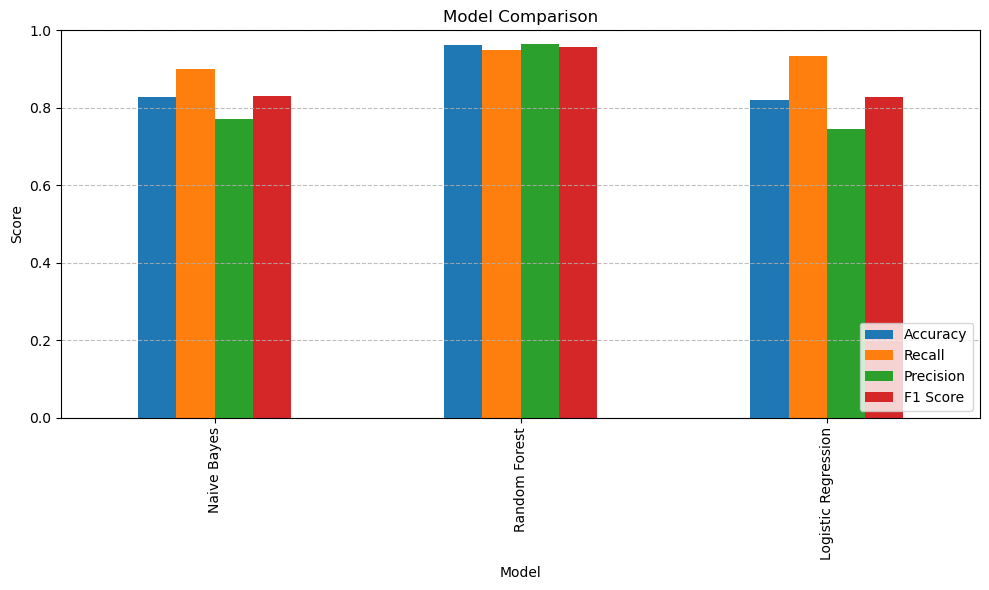

In [124]:
df_results.set_index("Model").plot(kind="bar", figsize=(10, 6))

plt.title("Model Comparison")
plt.ylabel("Score")
plt.ylim(0, 1)  
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()